# Image Processing
It is a technique used for the analysis of an image in order to manipulate it and extract information from it.

<img src="data/im1.png" width="600">
<img src="data/im2.PNG" width="600">
<img src="data/im3.png" width="1000">

### What is the purpose of image processing?
- <b>Visualization</b> - Observe the objects that are not visible.
- <b>Image Sharpening and Restoration</b> - To create a better image.
- <b>Image Retrieval</b> - Seek for the image of interest.
- <b>Measurement of Pattern</b> - Measures various objects in an image.
- <b>Image Recognition</b> - Distinguish the objects in an image.

### Python can do this all!
Is there anything that Python can't do. You have to be kidding me!

**OpenCV is a Open-source computer vision** library available for multiple platforms including C++.
But first let's take a sneek peek at code of C++ I used for simplistic image processing task.
<img src="data/c++.PNG" width="2000">

**Too many words, the hell with this shit!**
It literally took me two months to actually learn to code this, with clear concepts of course. Plus it's tedious to set up the libraries and do the required configurations before you can write the actual code. If you do really want to check that out though, I have maintained a journal containing core code concepts for C++ to use with OpenCV.

### Moving forward with Python
Yes, people may claim why Python when much faster language exists that can process images way faster. I ask them, even if it is faster is it faster to debug them or write the code and not get stuck with the grammar of it?

**Disclaimer:** If you are hating C++ right at this instant, Python is built on C++.
***So***
<img src="data/haters.gif" width="500">
***C++ is going nowhere!***

### Installing OpenCV on Python
OpenCV doesn't have an official pre-compiled package solution available on either Windows, Mac, or on Linux. 
<img src="data/tenor.gif" width="200">

But don't you worry, this site: https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv has the solution. Some people are heavenly and they will go straight to ***Jana'ah***. These people have compiled the package for Windows and provided the complete solution. The download will be a **.whl** file. Choose appropriate version according to your Python version and your processor (32-bit or 64-bit).

Open CMD and go to directory where the downloaded file is present and install in this way:
- pip install "opencv_python‑3.4.3‑cp36‑cp36m‑win_amd64.whl"

### And now let's code

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

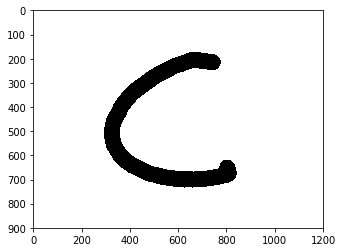

In [10]:
# Read the image
im = cv2.imread('samples/1 (1).png')
# Display the original image
plt.imshow(im)

#### Processing the original image
original -> BGR to gray -> resizing -> display

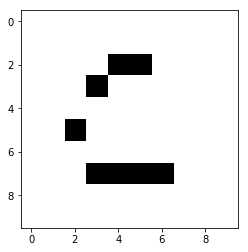

In [11]:
# Let's change the RGB image (or BGR as said in OpenCV) to Grayscale
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Now if you want to resize the image to 10x10 
im = cv2.resize(im, (10,10))
# Display the processed image
plt.imshow(im)

### Print the normalized pixel values
Normalization can be done by dividing the pixel values by the higest number possible which in the case of images in 255.
**Notice how matrix values printed below is exact representation of the image**
- 0 -> Black
- 1 -> White

In [8]:
print(im/255)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
